<a href="https://colab.research.google.com/github/Drazo23/Challenge-telecomX/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [43]:
import json
import pandas as pd

with open('TelecomX_Data.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

df = pd.DataFrame(data)

df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [44]:
type(data)


list

In [45]:
data[0].keys()


dict_keys(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'])

#🔧 Transformación

In [46]:
df = pd.json_normalize(data)

df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [47]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [48]:
df['account.Charges.Total'].unique()[:20]

array(['593.3', '542.4', '280.85', '1237.85', '267.4', '571.45',
       '7904.25', '5377.8', '340.35', '5957.9', '2460.55', '8456.75',
       '351.5', '7261.25', '2560.1', '6849.4', '1993.2', '72.1', '2791.5',
       '25.1'], dtype=object)

In [49]:
df['account.Charges.Total'] = pd.to_numeric(
    df['account.Charges.Total'],
    errors='coerce'
)

In [50]:
df['account.Charges.Total'].isnull().sum()

np.int64(11)

In [51]:
df.duplicated().sum()


np.int64(0)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [53]:
df['Cuentas_Diarias'] = df['account.Charges.Monthly'] / 30

In [54]:
df[['account.Charges.Monthly', 'Cuentas_Diarias']].head()


,account.Charges.Monthly,Cuentas_Diarias
0,65.6,2.186667
1,59.9,1.996667
2,73.9,2.463333
3,98.0,3.266667
4,83.9,2.796667


In [55]:
df.loc[~df['Churn'].isin(['Yes', 'No']), 'Churn'].unique()


array([''], dtype=object)

In [56]:
df_churn_invalidos = df[~df['Churn'].isin(['Yes', 'No'])]
df_churn_invalidos


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
30,0047-ZHDTW,,Female,0,No,No,11,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.00,929.30,2.633333
75,0120-YZLQA,,Male,0,No,No,71,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.90,1355.10,0.663333
96,0154-QYHJU,,Male,0,No,No,29,Yes,No,DSL,...,No,Yes,No,No,One year,Yes,Electronic check,58.75,1696.20,1.958333
98,0162-RZGMZ,,Female,1,No,No,5,Yes,No,DSL,...,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.90,287.85,1.996667
175,0274-VVQOQ,,Male,1,Yes,No,65,Yes,Yes,Fiber optic,...,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),103.15,6792.45,3.438333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7158,9840-GSRFX,,Female,0,No,No,14,Yes,Yes,DSL,...,No,No,No,No,One year,Yes,Mailed check,54.25,773.20,1.808333
7180,9872-RZQQB,,Female,0,Yes,No,49,No,No phone service,DSL,...,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),40.65,2070.75,1.355000
7211,9920-GNDMB,,Male,0,No,No,9,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,76.25,684.85,2.541667
7239,9955-RVWSC,,Female,0,Yes,Yes,67,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),19.25,1372.90,0.641667


In [57]:
df_churn_invalidos.shape

(224, 22)

In [58]:
df = df[df['Churn'].isin(['Yes', 'No'])]


In [59]:
df['Churn'].value_counts()


,count
Churn,
No,5174
Yes,1869


#📊 Carga y análisis

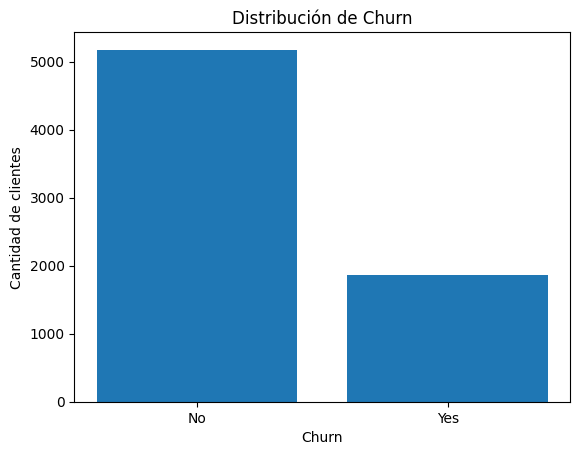

In [60]:
import matplotlib.pyplot as plt

churn_counts = df['Churn'].value_counts()

plt.figure()
plt.bar(churn_counts.index, churn_counts.values)
plt.title('Distribución de Churn')
plt.xlabel('Churn')
plt.ylabel('Cantidad de clientes')
plt.show()


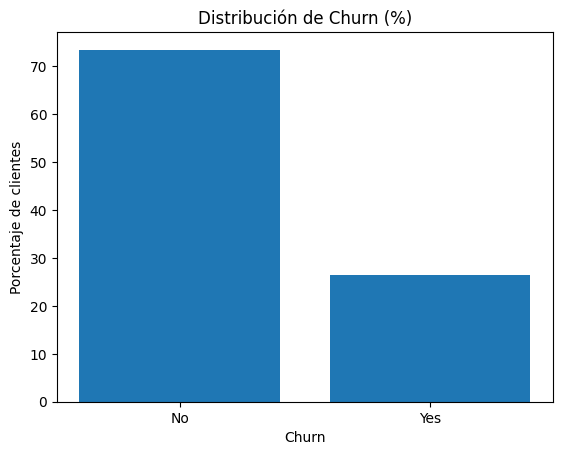

In [61]:
churn_percent = df['Churn'].value_counts(normalize=True) * 100

plt.figure()
plt.bar(churn_percent.index, churn_percent.values)
plt.title('Distribución de Churn (%)')
plt.xlabel('Churn')
plt.ylabel('Porcentaje de clientes')
plt.show()


<Axes: xlabel='customer.gender'>

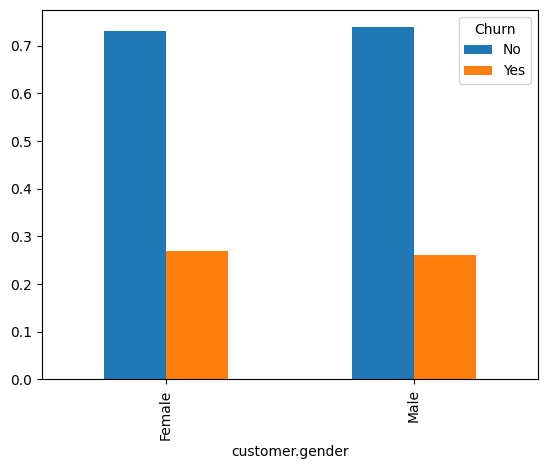

In [62]:
pd.crosstab(df['customer.gender'], df['Churn'], normalize='index').plot(kind='bar')


<Axes: xlabel='account.Contract'>

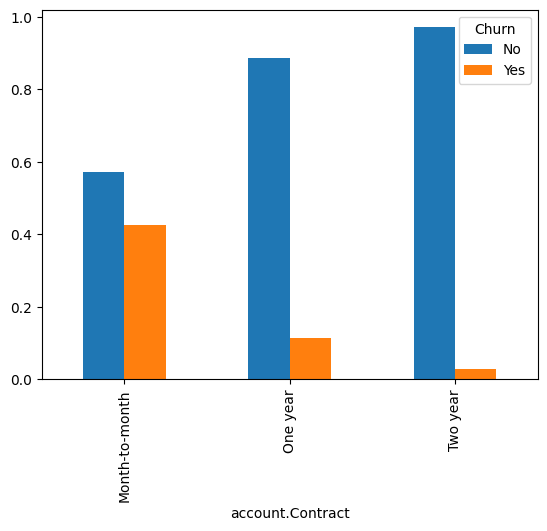

In [63]:
pd.crosstab(df['account.Contract'], df['Churn'], normalize='index').plot(kind='bar')


<Axes: xlabel='account.PaymentMethod'>

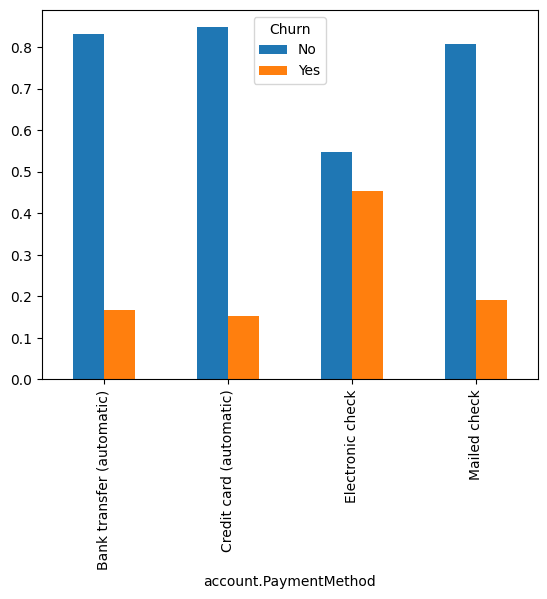

In [64]:
pd.crosstab(df['account.PaymentMethod'], df['Churn'], normalize='index').plot(kind='bar')


<Axes: title={'center': 'Promedio de Total Gastado según Churn'}, xlabel='Churn', ylabel='Total Gastado Promedio'>

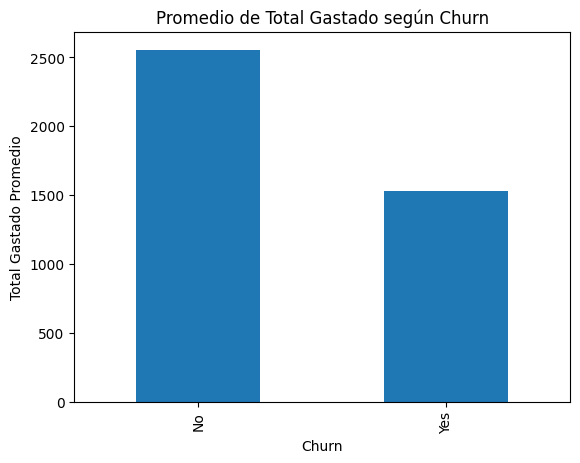

In [65]:
df.groupby('Churn')['account.Charges.Total'].mean().plot(
    kind='bar',
    title='Promedio de Total Gastado según Churn',
    ylabel='Total Gastado Promedio'
)


<Axes: title={'center': 'Promedio de Tiempo de Contrato según Churn'}, xlabel='Churn', ylabel='Meses de Contrato'>

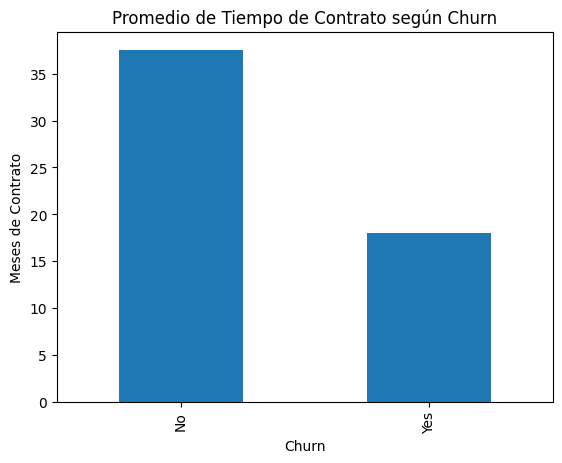

In [66]:
df.groupby('Churn')['customer.tenure'].mean().plot(
    kind='bar',
    title='Promedio de Tiempo de Contrato según Churn',
    ylabel='Meses de Contrato'
)


#📄Informe final

# **Introducción**


El objetivo de este análisis es comprender los factores asociados a la evasión de clientes (Churn) en Telecom X.
La empresa presenta una tasa relevante de cancelaciones, por lo que resulta clave identificar patrones en el comportamiento de los clientes para apoyar futuras estrategias de retención y el desarrollo de modelos predictivos.

# **Limpieza y Tratamiento de Datos**

Los datos fueron importados desde un archivo JSON y transformados en un DataFrame utilizando Python y pandas.
Durante el proceso de limpieza se realizaron las siguientes acciones:

Se normalizaron los datos anidados para obtener una estructura tabular.

Se verificó la ausencia de duplicados.

Se corrigió el formato de la variable Total gastado, convirtiéndola a tipo numérico.

Se identificaron y eliminaron registros con valores vacíos en la variable Churn, ya que no aportaban información útil para el análisis.

Se creó la variable Cuentas_Diarias, calculada a partir del cargo mensual.

Tras estos pasos, el dataset quedó consistente y listo para el análisis exploratorio.

### **Distribución de Churn**

El análisis muestra que:

El 73.46 % de los clientes permanecen en la empresa.

El 26.54 % de los clientes cancelan el servicio.

Esto indica que, aunque la mayoría de los clientes se mantiene, existe una proporción significativa de evasión que requiere atención.

## **Churn según variables categóricas**

*### Género:*

No se observan diferencias relevantes entre clientes masculinos y femeninos. La evasión se distribuye de manera similar en ambos grupos.

### *Tipo de contrato:*

Los clientes con contrato Month-to-Month presentan la mayor tasa de evasión.
En contraste, los contratos One Year y especialmente Two Year muestran una mayor retención, siendo este último el más estable.

### *Método de pago:*

El método Electronic Check concentra la mayor cantidad de cancelaciones.
Los métodos automáticos (transferencia bancaria y tarjeta de crédito) y el pago por correo presentan tasas de evasión menores y comportamientos más estables.

# **Churn según variables numéricas**

### *Total gastado:*

Los clientes que permanecen en la empresa tienden a tener un mayor gasto total acumulado.
Esto es coherente, ya que los clientes que se retiran interrumpen su consumo.

### *Tiempo de contrato (tenure):*

Los clientes con mayor antigüedad muestran una menor probabilidad de evasión.
La mayoría de las cancelaciones se concentra en clientes con poco tiempo de permanencia.

# **Conclusiones e Insights**



*  La evasión está fuertemente asociada al tipo de contrato, siendo los
*  contratos mensuales los más riesgosos.


*   El método de pago Electronic Check se relaciona con mayores tasas de cancelación.
*   El tiempo de permanencia es un factor clave: a mayor antigüedad, menor churn.


*   Variables como el género no parecen influir significativamente en la evasión.

# **Recomendaciones**

* Incentivar la migración de contratos Month-to-Month a contratos de mayor duración mediante beneficios o descuentos.

* Promover métodos de pago automáticos, reduciendo la dependencia del Electronic Check.

* Implementar estrategias de fidelización enfocadas en los primeros meses del cliente, etapa donde el riesgo de churn es mayor.

* Utilizar estas variables clave como base para futuros modelos predictivos de evasión.